In [205]:
from helper_functions import *
from data_formatting import * 
import numpy as np

import sys; sys.path
import pandas as pd
import seaborn as sns
import scipy.io as sio
import os
from sklearn.model_selection import RepeatedKFold, GroupKFold, LeaveOneGroupOut, KFold, StratifiedKFold,  ShuffleSplit
import helper_functions 
import data_formatting
from imp import reload

reload(helper_functions)
reload(data_formatting)

## all settings:

atlas='shen268'
y_var = 'normed_motor_scores'
chaco_type = 'chacovol'
subset = 'chronic'
models_tested = ['ridge']
verbose = False
covariates=['SEX', 'AGE', 'CHRONICITY']
nperms=5
crossval_type ='2'
n_splits=5
CSV_PATH = os.path.join("/home/ubuntu/enigma/Behaviour_Information_ALL_April7_2022_sorted.csv")  # Set this path accordingly
results_path = '/home/ubuntu/enigma/results' 

[X, Y, C, site] = create_data_set(CSV_PATH,atlas,covariates, verbose, y_var, chaco_type, subset)

if crossval_type == '1':
    print('1. Outer CV: Random partition fixed fold sizes, Inner CV: Random partition fixed fold sizes')
    outer_cv = RepeatedKFold(n_splits=n_splits, n_repeats = nperms, random_state=0)
    inner_cv = KFold(n_splits=n_splits, random_state=0, shuffle=True)

if crossval_type == '2':
    print('2. Outer CV: Leave-one-site-out, Inner CV:  Leave-one-site-out')
    outer_cv = LeaveOneGroupOut()
    inner_cv = LeaveOneGroupOut()

if crossval_type == '3':
    print('3. Outer CV: Leave-one-site-out, Inner CV:  Group K-fold')
    outer_cv = LeaveOneGroupOut()
    inner_cv = GroupKFold(n_splits=n_splits)

if crossval_type == '4':
    print('4. Outer CV: Group K-fold, Inner CV: Group K-fold')
    outer_cv = GroupKFold(n_splits=n_splits)
    inner_cv = GroupKFold(n_splits=n_splits)

Loading data for atlas: shen268, ChaCo scores: chacovol, subset: chronic
Final size of data: 
 X_data: 628 by 268 
 Y_data: length 628 
2. Outer CV: Leave-one-site-out, Inner CV:  Leave-one-site-out


In [214]:
def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name,n)

cmap = get_cmap(len(np.unique(site)))

np.random.shuffle(cmap.colors)

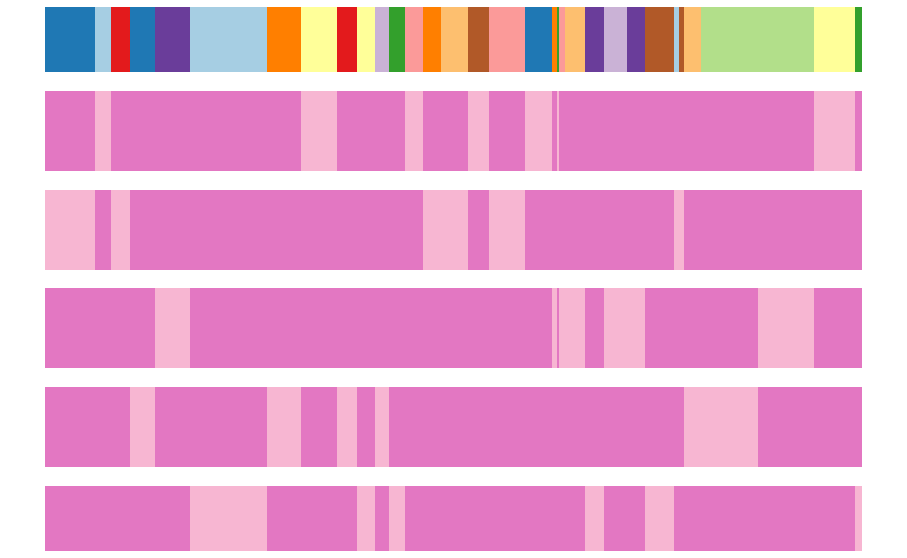

In [341]:
# Generate the training/testing visualizations for each CV split
outer_cv = GroupKFold(n_splits=n_splits)

fig, ax = plt.subplots(figsize=(16, 10))

cmap_data = cmap
cmap_cv = plt.cm.tab20

cv=outer_cv
lw=80
for ii, (tr, tt) in enumerate(cv.split(X=X, y=Y, groups=site)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    ax.scatter(
        range(len(indices)),
        [ii + 0.5] * len(indices),
        c=indices,
        marker="_",
        lw=lw,
        cmap=cmap_cv,
        vmin=-8.11,
        vmax=5,
    )
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=site, marker="_", lw=lw, cmap=cmap_data
    )
    ax.axis('off')
plt.savefig('/home/ubuntu/enigma/results/groupkfold.pdf')

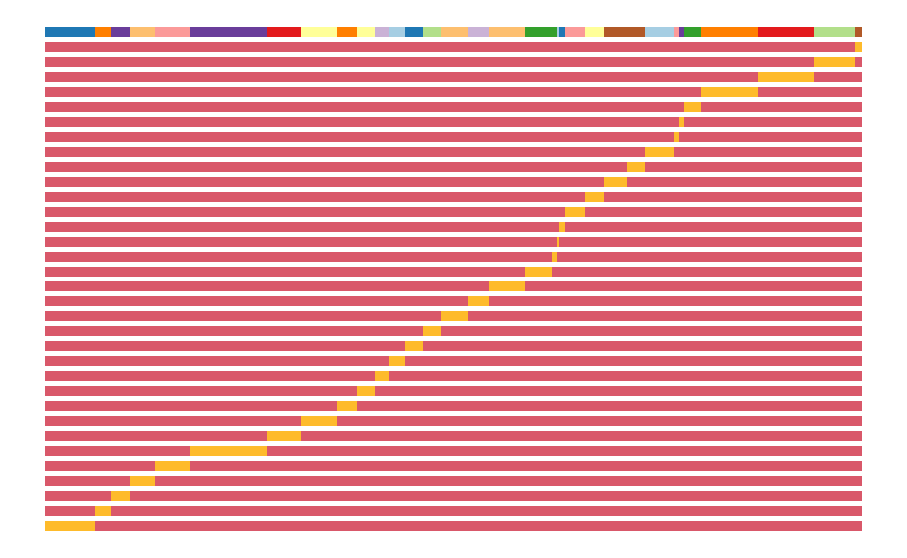

In [211]:
# Generate the training/testing visualizations for each CV split
outer_cv = LeaveOneGroupOut()

fig, ax = plt.subplots(figsize=(16, 10))

cmap_data = cmap
cmap_cv = plt.cm.plasma

cv=outer_cv
lw=10
for ii, (tr, tt) in enumerate(cv.split(X=X, y=Y, groups=site)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    ax.scatter(
        range(len(indices)),
        [ii + 0.5] * len(indices),
        c=indices,
        marker="_",
        lw=lw,
        cmap=cmap_cv,
        vmin=-1.9,
        vmax=1.5,
    )
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=site, marker="_", lw=lw, cmap=cmap_data
    )
    ax.axis('off')
plt.savefig('/home/ubuntu/enigma/results/LeaveOneGroupOut.pdf')

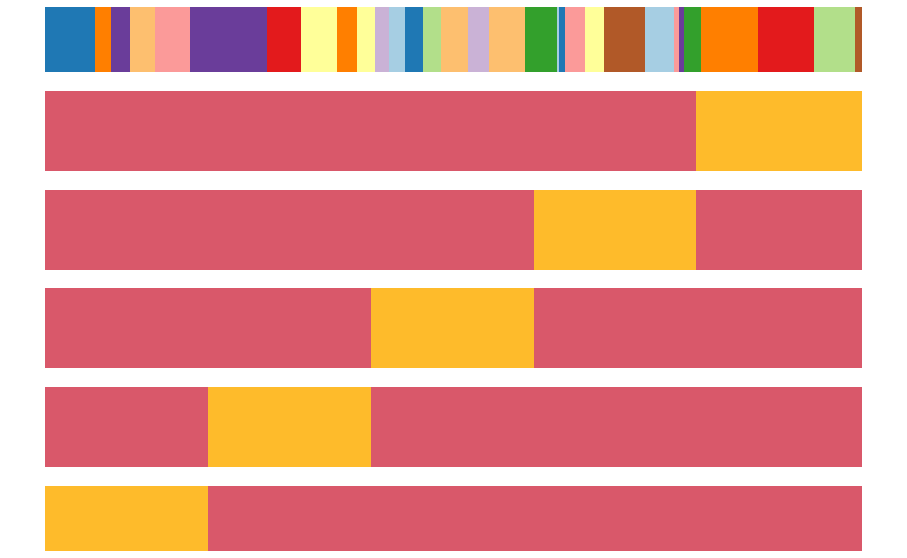

In [210]:
# Generate the training/testing visualizations for each CV split
outer_cv = KFold(n_splits=n_splits)

fig, ax = plt.subplots(figsize=(16, 10))

cmap_data = cmap
cmap_cv = plt.cm.plasma

cv=outer_cv
lw=80
for ii, (tr, tt) in enumerate(cv.split(X=X, y=Y, groups=site)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    ax.scatter(
        range(len(indices)),
        [ii + 0.5] * len(indices),
        c=indices,
        marker="_",
        lw=lw,
        cmap=cmap_cv,
        vmin=-1.9,
        vmax=1.5,
    )
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=site, marker="_", lw=lw, cmap=cmap_data
    )
    ax.axis('off')
plt.savefig('/home/ubuntu/enigma/results/kfold.pdf')

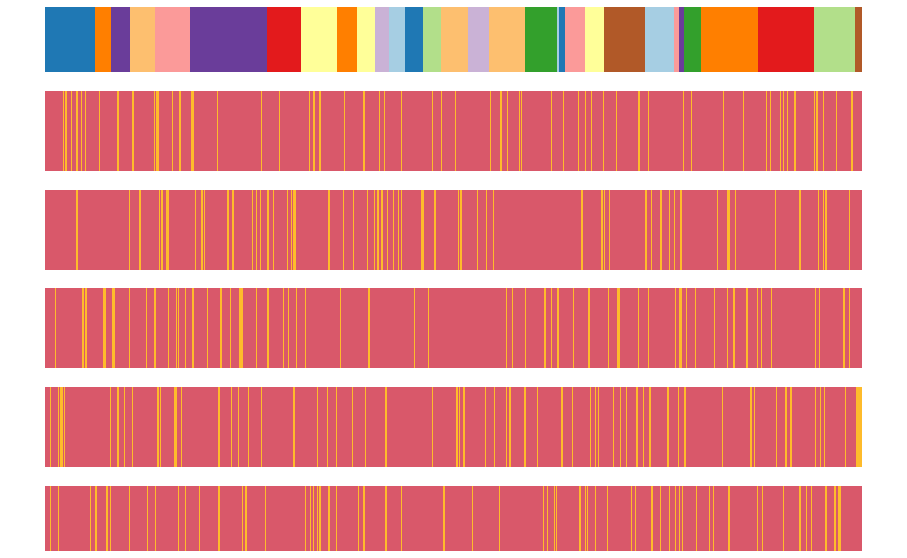

In [209]:
# Generate the training/testing visualizations for each CV split
outer_cv = ShuffleSplit(n_splits=5)

fig, ax = plt.subplots(figsize=(16, 10))

cmap_data = cmap
cmap_cv = plt.cm.plasma

cv=outer_cv
lw=80
for ii, (tr, tt) in enumerate(cv.split(X=X, y=Y, groups=site)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    ax.scatter(
        range(len(indices)),
        [ii + 0.5] * len(indices),
        c=indices,
        marker="_",
        lw=lw,
        cmap=cmap_cv,
        vmin=-1.9,
        vmax=1.5,
    )
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=site, marker="_", lw=lw, cmap=cmap_data
    )
    ax.axis('off')
plt.savefig('/home/ubuntu/enigma/results/shufflesplit.pdf')